<a href="https://colab.research.google.com/github/Putthakun/EDA/blob/main/KNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Handle the given data with EDA techniques.

##  Import Python Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## dataread and check data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/loan approval.csv")

In [ ]:
data.shape

(614, 12)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Income(dollar),Coapplicant,Loan_Amount,Term(month),loan_History,Area,Status
0,Male,No,0,Not Graduate,No,144200.0,No,3500000,360.0,1.0,Urban,N
1,Female,No,3+,Not Graduate,No,183000.0,No,0,360.0,0.0,Urban,N
2,Male,Yes,1,Graduate,No,188000.0,No,6100000,360.0,NaN,Rural,N
3,Male,Yes,0,Graduate,No,195000.0,Yes,13500000,360.0,1.0,Rural,N
4,Female,No,0,Not Graduate,No,196300.0,No,5300000,360.0,1.0,Semiurban,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          601 non-null    object 
 1   Married         611 non-null    object 
 2   Dependents      599 non-null    object 
 3   Education       614 non-null    object 
 4   Self_Employed   582 non-null    object 
 5   Income(dollar)  614 non-null    float64
 6   Coapplicant     610 non-null    object 
 7   Loan_Amount     614 non-null    int64  
 8   Term(month)     600 non-null    float64
 9   loan_History    564 non-null    float64
 10  Area            614 non-null    object 
 11  Status          614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


In [ ]:
data.isnull().sum()

Gender            13
Married            3
Dependents        15
Education          0
Self_Employed     32
Income(dollar)     0
Coapplicant        4
Loan_Amount        0
Term(month)       14
loan_History      50
Area               0
Status             0
dtype: int64

In [ ]:
data.nunique()

Gender              2
Married             3
Dependents          4
Education           2
Self_Employed       2
Income(dollar)    554
Coapplicant         2
Loan_Amount       204
Term(month)        10
loan_History        2
Area                3
Status              2
dtype: int64

In [ ]:
data.describe()

,Income(dollar),Loan_Amount,Term(month),loan_History
count,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,7.024705e+05,1.414104e+07,342.00000,0.842199
std,6.458664e+05,8.815682e+06,65.12041,0.364878
min,1.442000e+05,0.000000e+00,12.00000,0.000000
25%,4.166000e+05,9.800000e+06,360.00000,1.000000
50%,5.416500e+05,1.250000e+07,360.00000,1.000000
75%,7.521750e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,7.000000e+07,480.00000,1.000000


In [ ]:
(data.isnull().sum()/(len(data)))*100

Gender            2.117264
Married           0.488599
Dependents        2.442997
Education         0.000000
Self_Employed     5.211726
Income(dollar)    0.000000
Coapplicant       0.651466
Loan_Amount       0.000000
Term(month)       2.280130
loan_History      8.143322
Area              0.000000
Status            0.000000
dtype: float64

In [ ]:
data[data.isnull().any(axis=1)]

,Gender,Married,Dependents,Education,Self_Employed,Income(dollar),Coapplicant,Loan_Amount,Term(month),loan_History,Area,Status
2,Male,Yes,1,Graduate,No,188000.0,No,6100000,360.0,NaN,Rural,N
7,Female,No,0,Not Graduate,No,216500.0,NaN,7000000,360.0,1.0,Semiurban,Y
17,Male,Yes,0,Graduate,No,240000.0,No,7500000,360.0,NaN,Urban,Y
21,Male,No,0,Graduate,No,250000.0,NaN,9600000,480.0,1.0,Semiurban,N
22,Female,No,0,Graduate,Yes,250000.0,No,9300000,360.0,NaN,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
601,NaN,Yes,3+,Graduate,No,2380300.0,No,37000000,360.0,1.0,Rural,Y
604,Male,Yes,0,Graduate,No,2750000.0,Yes,48000000,360.0,NaN,Urban,Y
609,Female,No,3+,Graduate,NaN,4208300.0,Yes,35000000,180.0,NaN,Urban,N
611,NaN,Yes,3+,Graduate,No,5176300.0,No,70000000,300.0,1.0,Urban,Y


##Clean data

### Status N = 0 , Y = 1

In [ ]:
data["Status"] = data["Status"].replace("N", 0).replace("Y", 1)

### 2 decimal places

In [ ]:
data["Income(dollar)"] = round(data["Income(dollar)"], 2)

In [ ]:
data["Loan_Amount"] = round(data["Loan_Amount"], 2)

### Nah = median ** loan_History

In [ ]:
data['loan_History'] = data['loan_History'].fillna(data['loan_History'].median())

### Dorp row have Nah

In [ ]:
data.dropna()

,Gender,Married,Dependents,Education,Self_Employed,Income(dollar),Coapplicant,Loan_Amount,Term(month),loan_History,Area,Status
0,Male,No,0,Not Graduate,No,144200.0,No,3500000,360.0,1.0,Urban,0
1,Female,No,3+,Not Graduate,No,183000.0,No,0,360.0,0.0,Urban,0
2,Male,Yes,1,Graduate,No,188000.0,No,6100000,360.0,1.0,Rural,0
3,Male,Yes,0,Graduate,No,195000.0,Yes,13500000,360.0,1.0,Rural,0
4,Female,No,0,Not Graduate,No,196300.0,No,5300000,360.0,1.0,Semiurban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
606,Male,No,0,Graduate,No,3567300.0,Yes,9000000,360.0,1.0,Urban,0
607,Male,No,1,Graduate,No,3771900.0,No,15200000,360.0,1.0,Semiurban,1
608,Male,Yes,3+,Graduate,No,3999900.0,No,60000000,180.0,0.0,Semiurban,1
610,Male,Yes,0,Graduate,Yes,4389700.0,Yes,12000000,360.0,1.0,Semiurban,1


### Check Outlier

In [ ]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

Income(dollar)
Skew : 5.63


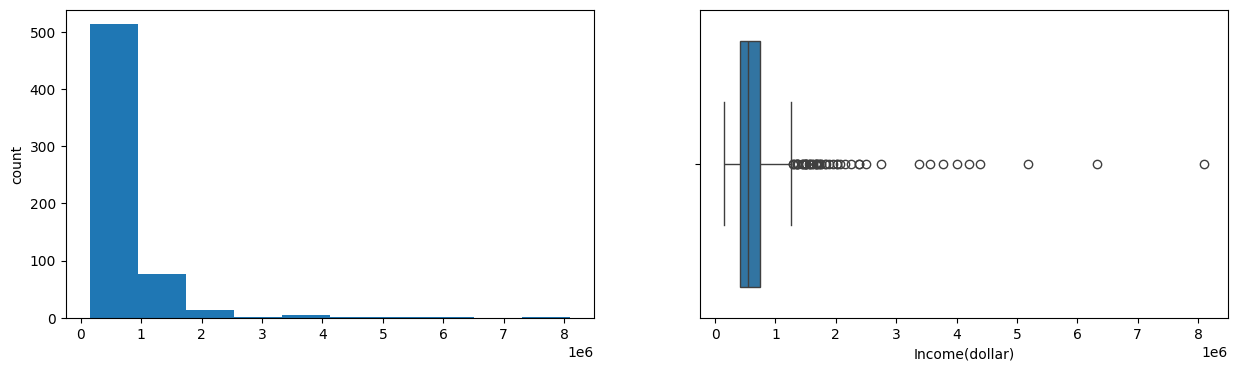

Loan_Amount
Skew : 2.38


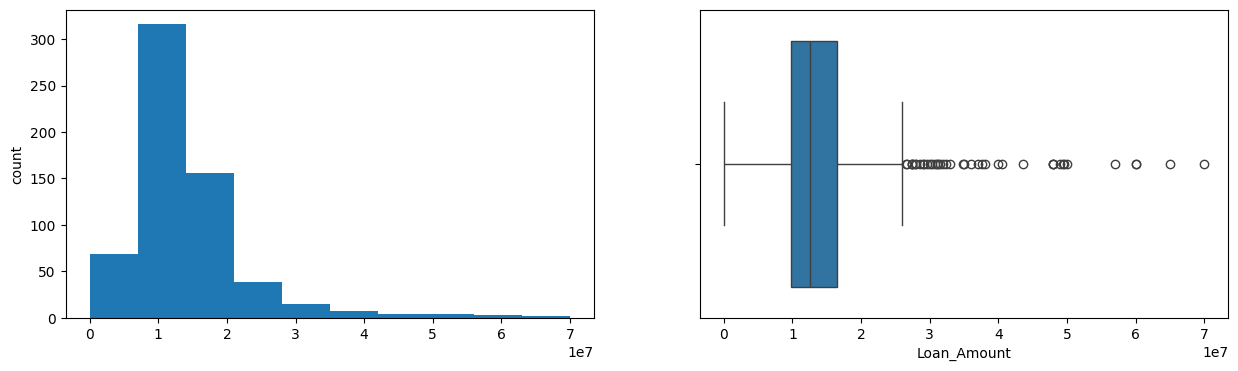

Term(month)
Skew : -2.36


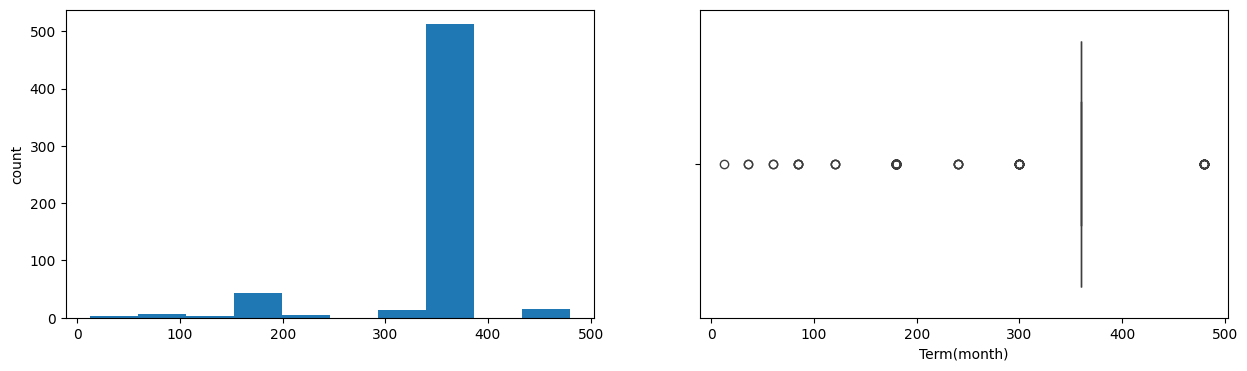

loan_History
Skew : -2.02


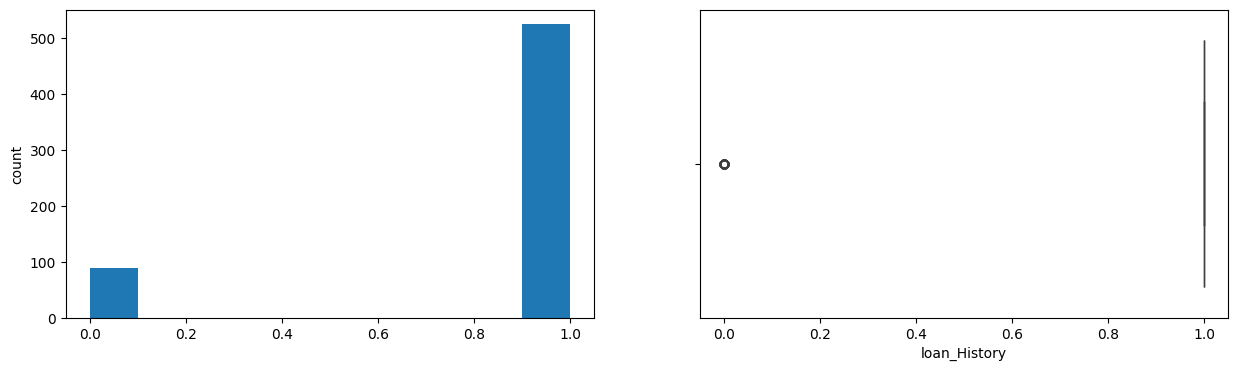

Status
Skew : -0.81


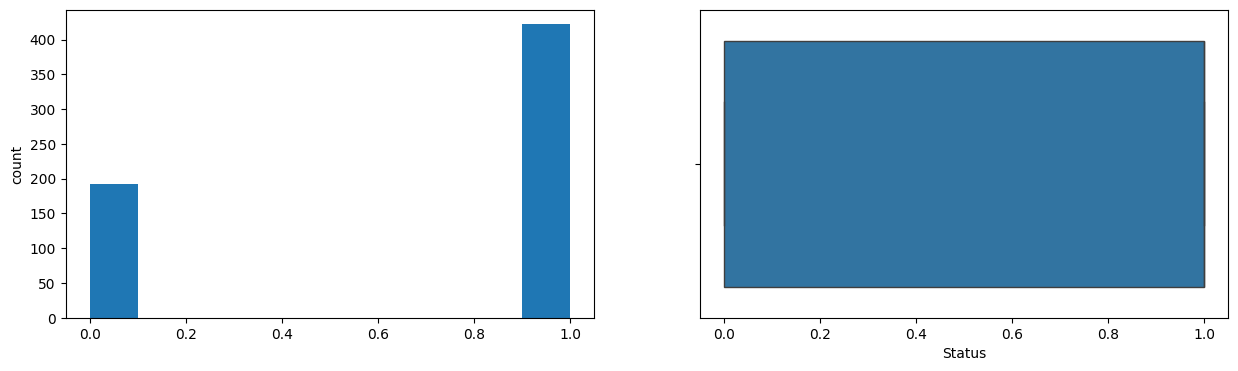

In [ ]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

##K-NN Model

In [ ]:
x = data[['Income(dollar)','Loan_Amount','loan_History']]
y = data['Status']


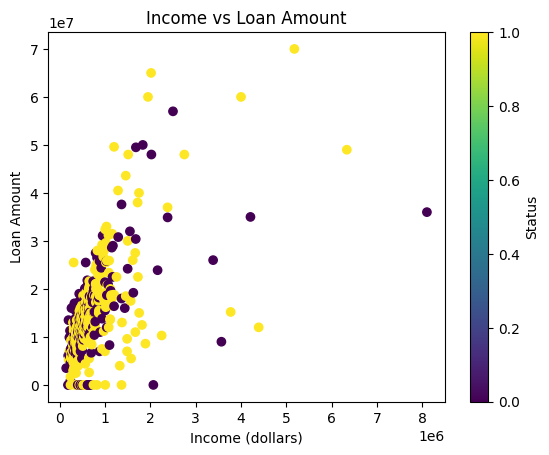

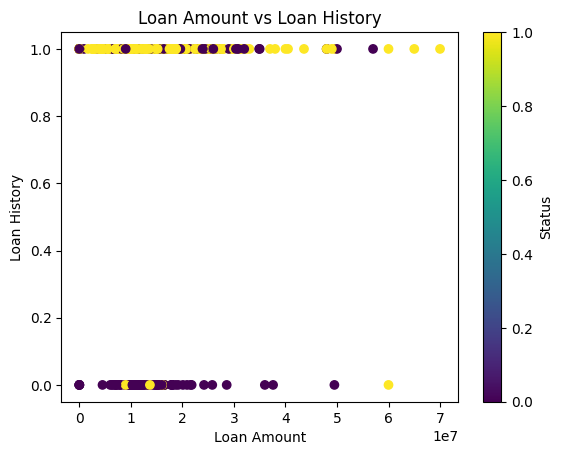

In [ ]:
plt.scatter(x['Income(dollar)'], x['Loan_Amount'], c=y, cmap='viridis')
plt.xlabel('Income (dollars)')
plt.ylabel('Loan Amount')
plt.title('Income vs Loan Amount')
plt.colorbar(label='Status')
plt.show()

# Scatter plot for 'Loan_Amount' against 'loan_History'
plt.scatter(x['Loan_Amount'], x['loan_History'], c=y, cmap='viridis')
plt.xlabel('Loan Amount')
plt.ylabel('Loan History')
plt.title('Loan Amount vs Loan History')
plt.colorbar(label='Status')
plt.show()

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(x,y ,train_size = 0.7, random_state = 5)

In [ ]:
print(train_x.count())

Income(dollar)    429
Loan_Amount       429
loan_History      429
dtype: int64


In [ ]:
KNNmodel = KNeighborsClassifier(n_neighbors=11)
KNNmodel = KNNmodel.fit(train_x,train_y)

In [ ]:
KNNScore = KNNmodel.score(test_x,test_y)
print(KNNScore)

0.6972972972972973


In [ ]:
train_x,test_x,train_y,test_y = model_selection.train_test_split(x, y, train_size=0.80, test_size=0.20, random_state=101)